Epoch 1/3
14523/14523 - 483s - loss: 0.4132 - accuracy: 0.8247 - val_loss: 0.3598 - val_accuracy: 0.8440 - lr: 0.0010 - 483s/epoch - 33ms/step
4539/4539 [==============================] - 22s 5ms/step
Training set:
Accuracy: 0.8580862290086849
Precision: 0.8245197610222729
Recall: 0.9109128727552309
F1 Score: 0.8655659108143148
Validation set:
Accuracy: 0.8449567564589875
Precision: 0.8141547924649974
Recall: 0.8971044396769653
F1 Score: 0.8536192123158538

Epoch 2/3
14523/14523 - 477s - loss: 0.3430 - accuracy: 0.8594 - val_loss: 0.3379 - val_accuracy: 0.8552 - lr: 0.0010 - 477s/epoch - 33ms/step
4539/4539 [==============================] - 26s 6ms/step
Training set:
Accuracy: 0.879630570068601
Precision: 0.8609395885632315
Recall: 0.9064061727717063
F1 Score: 0.8830880459608678
Validation set:
Accuracy: 0.8547278686718449
Precision: 0.8396103388018049
Recall: 0.8797775378855167
F1 Score: 0.8592247586128664

Epoch 3/3
14523/14523 - 469s - loss: 0.3052 - accuracy: 0.8798 - val_loss: 0.

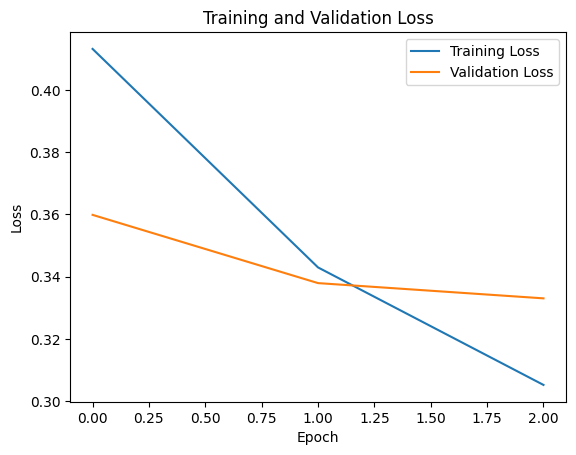


Validation Loss Metrics for each epoch:
[0.41315126419067383, 0.34296777844429016, 0.30522701144218445] [0.35984721779823303, 0.33792781829833984, 0.3330327570438385]


In [ ]:
# -*- coding: utf-8 -*-
"""NLP Project CNN.ipynb

KEERTHI BALAJI

Automatically generated by Colaboratory.

Original file is located at
    https://colab.research.google.com/drive/1CEinhSzcZcVmuJncFjMs0W30iYTvbR7J

"""

# Importing necessary libraries
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
from keras.regularizers import l2
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler

# Load data from CSV
df = pd.read_csv('HateSpeechDatasetBalanced.csv')

# Seperating text and labels
texts = df['Content'].tolist()
labels = df['Label'].tolist()

# Tokenization
max_words = 10000  # Maximum number of words to keep, based on word frequency
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)  # Updates internal vocabulary based on texts
sequences = tokenizer.texts_to_sequences(texts)  # Transforms each text in texts to a sequence of integers

# Padding sequences to ensure uniform length
maxlen = 100  # Maximum length of all sequences
X = pad_sequences(sequences, maxlen=maxlen)  # Pads sequences to the same length
y = np.array(labels)  # Converting labels to numpy array for model input

# Define the learning rate schedule
def lr_schedule(epoch):
    """
    Learning rate schedule function.
    """
    initial_lr = 0.001  # Initial learning rate
    drop = 0.5  # Learning rate drop factor
    epochs_drop = 3  # Number of epochs after which learning rate should drop
    lr = initial_lr * (drop ** (epoch // epochs_drop))  # Computing learning rate
    return lr

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# CNN model architecture
model = Sequential()
model.add(Embedding(max_words, 128, input_length=maxlen))  # Embedding layer
model.add(Conv1D(64, 3, activation='relu'))  # Convolutional layer with ReLU activation
model.add(GlobalMaxPooling1D())  # Global max pooling layer
model.add(Dense(32, activation='relu', kernel_regularizer=l2(0.01)))  # Dense layer with ReLU activation and L2 regularization
model.add(Dropout(0.5))  # Dropout layer to prevent overfitting
model.add(Dense(1, activation='sigmoid', kernel_regularizer=l2(0.01)))  # Output layer with sigmoid activation for binary classification

optimizer = Adam(learning_rate=0.001)  # Adam optimizer with initial learning rate
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])  # Compiling the model

# Define learning rate scheduler callback
lr_scheduler = LearningRateScheduler(lr_schedule)

# Lists to store metrics for each epoch
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []
loss_list = []
val_loss_list = []

# Model training
for epoch in range(3):  # Training for 3 epochs
    print(f"Epoch {epoch + 1}/3")
    history = model.fit(X_train, y_train, epochs=1, batch_size=32, validation_split=0.2, verbose=2, callbacks=[lr_scheduler])

    # Evaluation on training set
    y_train_pred = (model.predict(X_train) > 0.5).astype(int)
    accuracy_train = accuracy_score(y_train, y_train_pred)
    precision_train = precision_score(y_train, y_train_pred)
    recall_train = recall_score(y_train, y_train_pred)
    f1_train = f1_score(y_train, y_train_pred)

    # Evaluation on validation set
    y_val_pred = (model.predict(X_test) > 0.5).astype(int)
    accuracy_val = accuracy_score(y_test, y_val_pred)
    precision_val = precision_score(y_test, y_val_pred)
    recall_val = recall_score(y_test, y_val_pred)
    f1_val = f1_score(y_test, y_val_pred)

    # Printing metrics for each epoch
    print("Training set:")
    print("Accuracy:", accuracy_train)
    print("Precision:", precision_train)
    print("Recall:", recall_train)
    print("F1 Score:", f1_train)

    print("Validation set:")
    print("Accuracy:", accuracy_val)
    print("Precision:", precision_val)
    print("Recall:", recall_val)
    print("F1 Score:", f1_val)
    print()

    # Appending metrics to lists
    accuracy_list.append(accuracy_val)
    precision_list.append(precision_val)
    recall_list.append(recall_val)
    f1_list.append(f1_val)
    loss_list.append(history.history['loss'][0])
    val_loss_list.append(history.history['val_loss'][0])

# Plotting loss curves for training and validation
plt.plot(loss_list, label='Training Loss')
plt.plot(val_loss_list, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Printing metrics for each epoch in a table
metrics_df = pd.DataFrame(history.history)
metrics_df.index += 1  # Starting indexing epochs from 1
print("\nValidation Loss Metrics for each epoch:")
print(loss_list, val_loss_list)
